(100, 100)


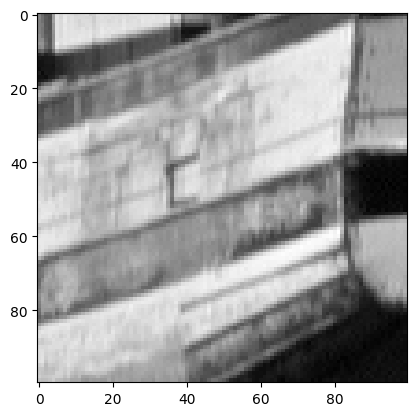

(100, 100)


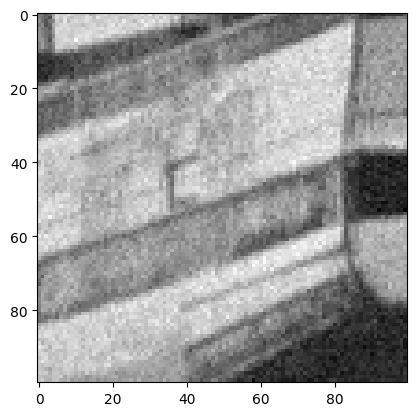

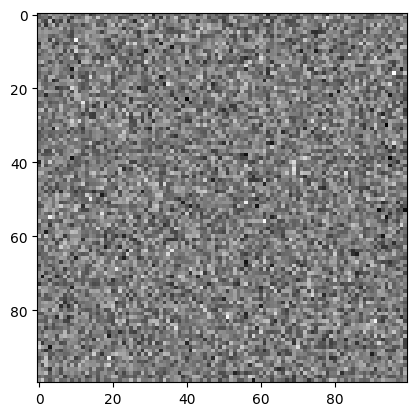

In [114]:
# Alex Domagala
# ECE 6560

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../images/boats.bmp')
img = np.array(img)
img = img[300:400,300:400]
print(img.shape)
#cv2.imwrite('../report_images/boat_crop_gen.png', img)
#noise = 10*np.random.randn(img.shape[0],img.shape[1]) # standard normal distribution
#img2 = Im#age.open('../report_images/boat_crop_gen2.png')
#img2 = np.array(img2)
#img2 = img2[:,:,0]
mean = 0
std_dev = 1
scale = 1
x = int(img.shape[0]/scale)
y = int(img.shape[1]/scale)
noise = 10*np.random.normal(mean, std_dev, (x,y))
#noise = cv2.resize(noise,(img.shape[0],img.shape[1]),interpolation=cv2.INTER_NEAREST)


# #salt and pepper noise
# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#     if (np.random.randint(0, 100) == 3):
#       img[i][j] = 1


#print(noise.shape)
plt.imshow(img,cmap='gray')
plt.show()
img2 = img + noise
plt.imshow(img2, cmap='gray')
print(img2.shape)
plt.show()
plt.imshow(noise, cmap='gray')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\311622781.py:8: RuntimeWarning: overflow encountered in scalar subtract
  Iy = (I[i,j+1] - I[i,j-1])/2
C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\311622781.py:7: RuntimeWarning: overflow encountered in scalar subtract
  Ix = (I[i+1,j] - I[i-1,j])/2


180.31222920256963
69.85715102336063


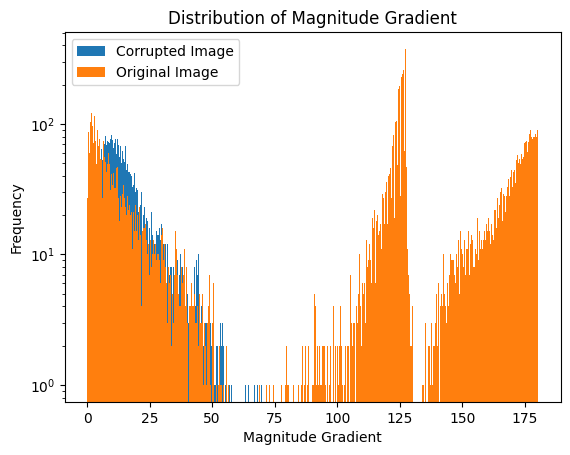

In [115]:
def GradientHist(I):

  gradients = []
  # iterate through all the pixels in the image
  for i in range(1,I.shape[0]-1):
    for j in range(1,I.shape[1]-1):
      Ix = (I[i+1,j] - I[i-1,j])/2
      Iy = (I[i,j+1] - I[i,j-1])/2
      ret = np.sqrt(np.power(Ix,2) + np.power(Iy,2))
      gradients.append(ret)
  return np.array(gradients)

grads = GradientHist(img)
grads2 = GradientHist(img2)
#gradNoise = GradientHist(noise)

plt.title('Distribution of Magnitude Gradient')
plt.hist(grads2,bins=500,log=True,label='Corrupted Image')
plt.hist(grads,bins=500,log=True,label='Original Image')
plt.xlabel('Magnitude Gradient')
plt.ylabel('Frequency')
plt.legend()
print(np.max(grads))
print(np.max(grads2))

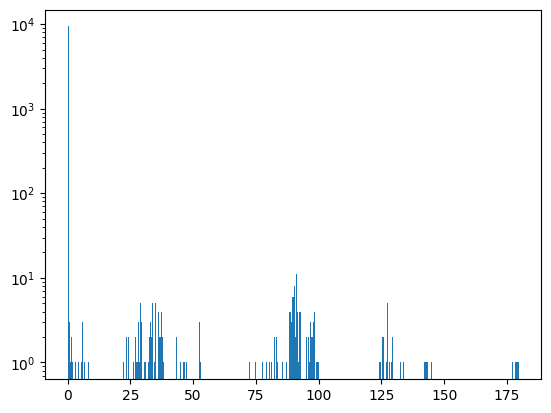

In [99]:
diff = np.abs(grads2-grads)
plt.hist(diff,log=True,bins=500)
plt.show()